In [3]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = load_breast_cancer()
x = data.data
y = data.target
data.data.shape
x.shape

(569, 30)

In [7]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [9]:
lrl1 = lrl1.fit(x,y)
lrl1.coef_


array([[ 3.97819903,  0.03133611, -0.13410046, -0.0161731 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50166573,  0.        , -0.07121074,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24497932, -0.12825136, -0.01444537,  0.        ,
         0.        , -2.06259546,  0.        ,  0.        ,  0.        ]])

In [10]:
(lrl1.coef_ != 0).sum(axis=1)


array([10])

In [11]:
lrl2 = lrl2.fit(x,y)
lrl2.coef_

array([[ 1.61520485e+00,  1.03164959e-01,  4.89949190e-02,
        -4.54506031e-03, -9.48008791e-02, -3.01421091e-01,
        -4.56860007e-01, -2.23258689e-01, -1.36553831e-01,
        -1.93906484e-02,  1.51862999e-02,  8.84898972e-01,
         1.16165127e-01, -9.44762688e-02, -9.89656328e-03,
        -2.29725481e-02, -5.65957760e-02, -2.71051009e-02,
        -2.78528078e-02,  3.23046051e-04,  1.25588855e+00,
        -3.02228727e-01, -1.72470478e-01, -2.21057115e-02,
        -1.74443797e-01, -8.78235965e-01, -1.16396037e+00,
        -4.29422513e-01, -4.23200620e-01, -8.69294155e-02]])

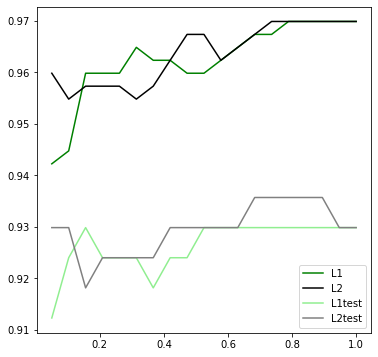

In [16]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l1, l2, l1test, l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=0)
plt.show()